In [396]:
import numpy as nm
import math
import matplotlib.pyplot as plt
import networkx as nx
from qiskit import *

In [397]:
pi = math.pi
q=QuantumRegister(4)
c=ClassicalRegister(4)
qc=QuantumCircuit(q,c)

In [398]:
a,y = -2.1468161569569744,-2.2720248690427645

In [399]:
for i in range(4):
    qc.h(i)

qc.cx(0,1)
qc.rz(a,1)
qc.cx(0,1)

qc.cx(0,3)
qc.rz(a,3)
qc.cx(0,3)

qc.barrier()

qc.cx(1,2)
qc.rz(a,2)
qc.cx(1,2)

qc.cx(1,3)
qc.rz(a,3)
qc.cx(1,3)

qc.cx(2,3)
qc.rz(a,3)
qc.cx(2,3)

qc.barrier()

for i in range(4):
    qc.rx(y,i)

In [400]:
qc.barrier()

for i in range(4):
  qc.measure(q[i],c[i])

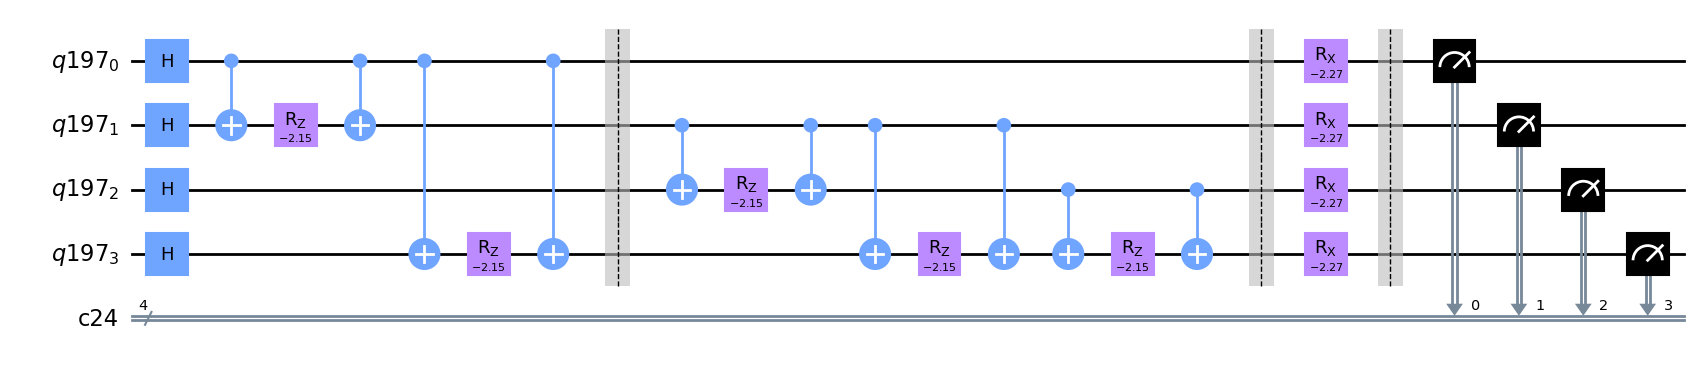

In [401]:
qc.draw(output="mpl")

In [402]:
sim = Aer.get_backend('aer_simulator')

res=execute(qc, backend=sim).result() 

In [403]:
res.get_counts()

{'0001': 72,
 '0110': 33,
 '0101': 84,
 '0010': 103,
 '0011': 27,
 '0000': 26,
 '1101': 116,
 '0100': 67,
 '1000': 91,
 '1010': 81,
 '1110': 71,
 '1001': 30,
 '1100': 30,
 '0111': 110,
 '1111': 22,
 '1011': 61}

In [404]:
result = res.get_counts()
c=0
for i in range(len(result)):
    key = list(result.keys())[i]
    c += result[key]
print(c)

1024


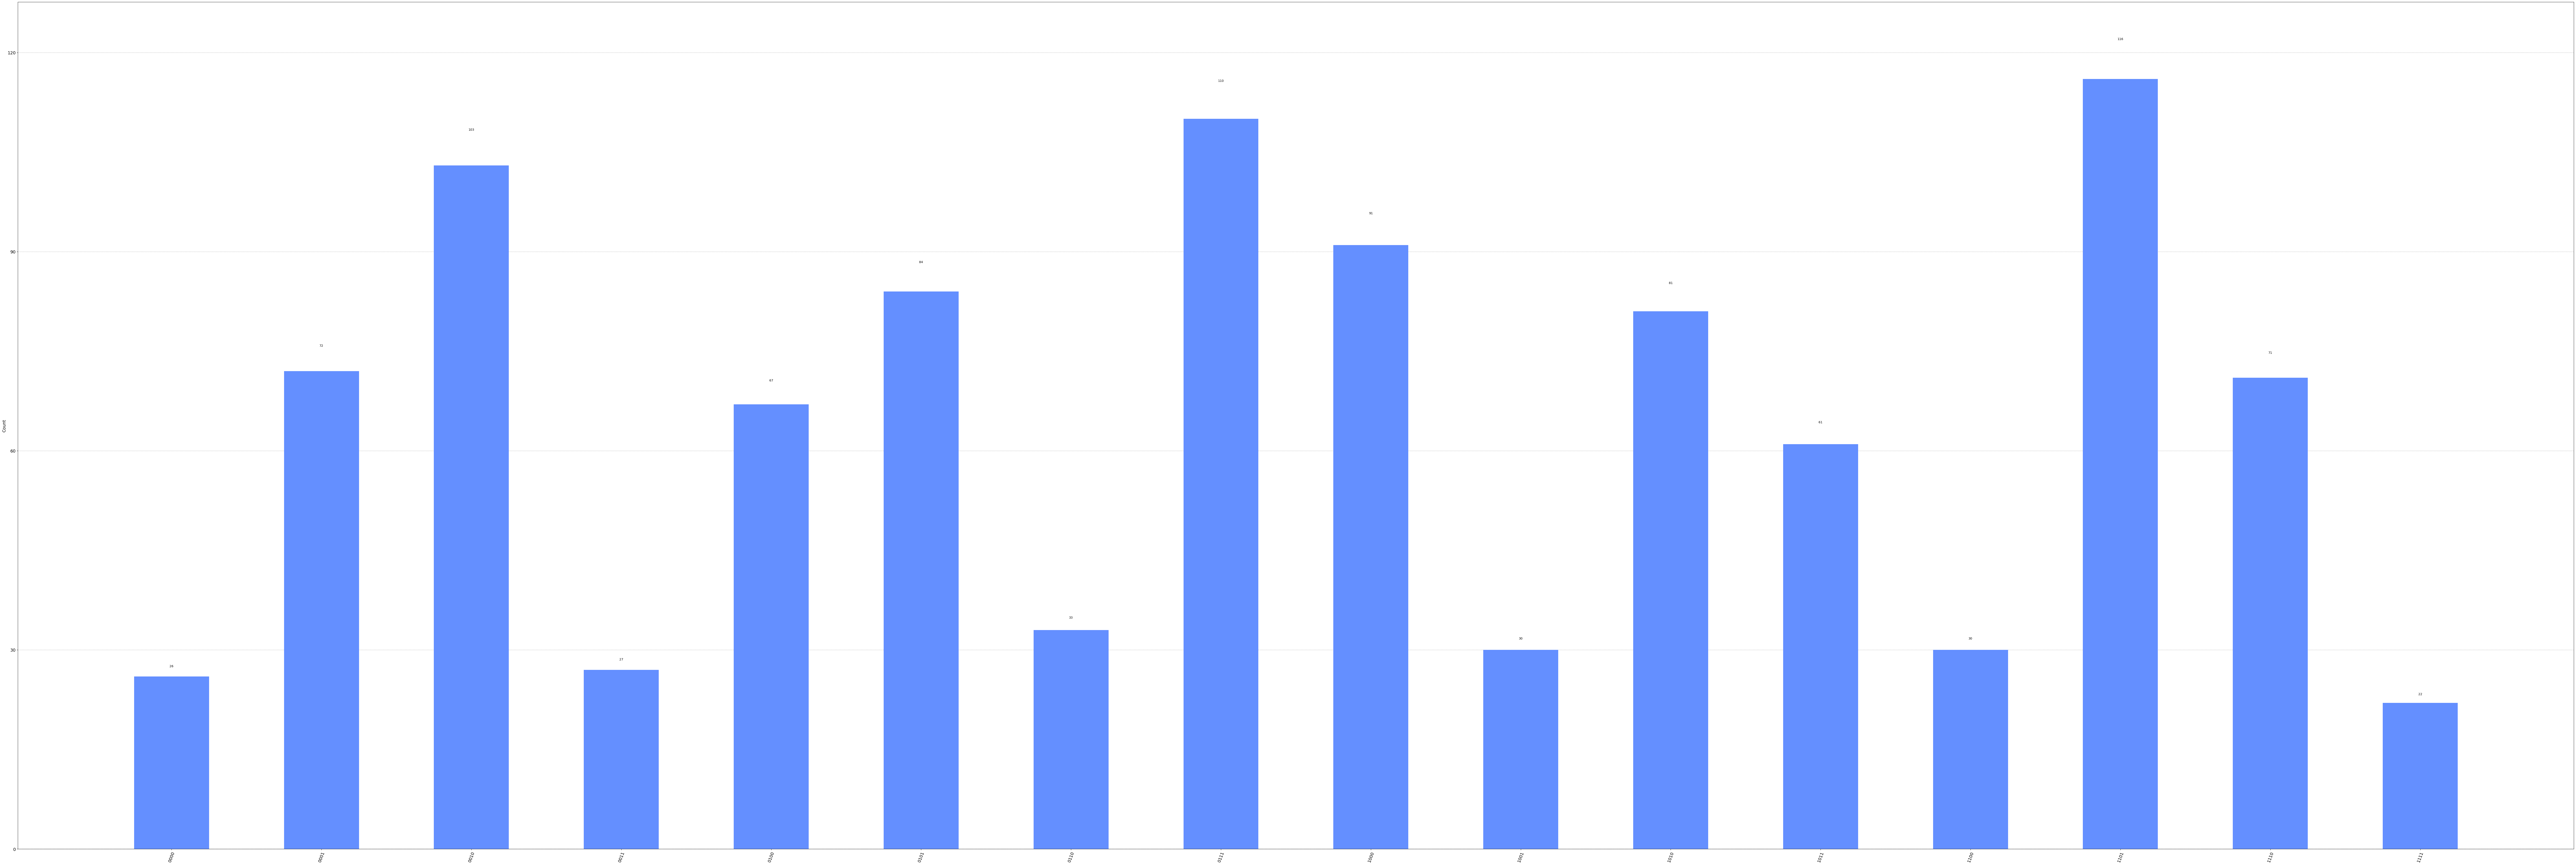

In [405]:
from qiskit.visualization import plot_histogram as ph
ph(res.get_counts(qc),figsize=(150,50))